In [1]:
import numpy as np
import matplotlib.pyplot as plt
import juanfit
from astropy.io import fits
from astropy.nddata import CCDData
from astropy.visualization import ImageNormalize, SqrtStretch, LogStretch, ZScaleInterval
from ccdproc import ImageFileCollection
from glob import glob
import os
import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoLocator, AutoMinorLocator, FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter


In [2]:
path = "../src/DKIST/pid_1_118/AQRMB/"
stokes_i_6301_file_collection = ImageFileCollection(path,glob_include="*I_AQRMB_*L1.fits")
stokes_i_6301_df = stokes_i_6301_file_collection.summary.to_pandas()

stokes_q_6301_file_collection = ImageFileCollection(path,glob_include="*Q_AQRMB_*L1.fits")
stokes_q_6301_df = stokes_q_6301_file_collection.summary.to_pandas()

stokes_u_6301_file_collection = ImageFileCollection(path,glob_include="*U_AQRMB_*L1.fits")
stokes_u_6301_df = stokes_u_6301_file_collection.summary.to_pandas()

stokes_v_6301_file_collection = ImageFileCollection(path,glob_include="*V_AQRMB_*L1.fits")
stokes_v_6301_df = stokes_v_6301_file_collection.summary.to_pandas()

In [7]:
for ii, row_ in stokes_i_6301_df.iterrows():
    if ii == 0:
        with fits.open(os.path.join(path,row_["file"])) as hdul:
            test_hdr = hdul[1].header
            test_data = hdul[1].data
            hdul.info()

Filename: ../src/DKIST/pid_1_118/AQRMB/VISP_2022_06_02T17_21_59_515_00630205_I_AQRMB_L1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  observation    1 CompImageHDU    298   (2556, 977, 1)   float64   


In [9]:
test_hdr

XTENSION= 'IMAGE   '                                                            
BITPIX  =                  -64                                                  
NAXIS   =                    3                                                  
NAXIS1  =                 2556 / [pix]                                          
NAXIS2  =                  977 / [pix]                                          
NAXIS3  =                    1 / [pix]                                          
PCOUNT  =                    0                                                  
GCOUNT  =                    1                                                  
BUNIT   = 'ct      '                                                            
DATE    = '2022-11-10T14:38:47.146376'                                          
DATE-BEG= '2022-06-02T17:21:59.515'                                             
DATE-END= '2022-06-02T17:21:59.780'                                             
TELAPSE =   0.26500057429075

In [8]:
wvl = test_hdr["CRVAL1"] + test_hdr["CDELT1"]*(np.linspace(1,test_hdr["NAXIS1"],test_hdr["NAXIS1"]) - test_hdr["CRPIX1"])
ycoord = test_hdr["CRVAL2"] + test_hdr["CDELT2"]*(np.linspace(1,test_hdr["NAXIS2"],test_hdr["NAXIS2"]) - test_hdr["CRPIX2"])

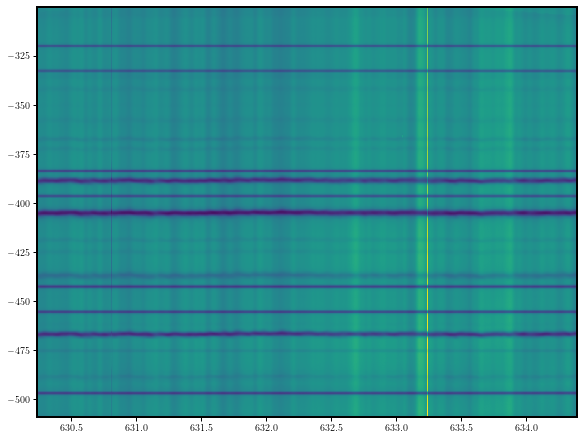

In [13]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)

ax.pcolormesh(wvl, ycoord, test_data[0,:,:],rasterized=True,shading="auto")

(630.0, 630.3)

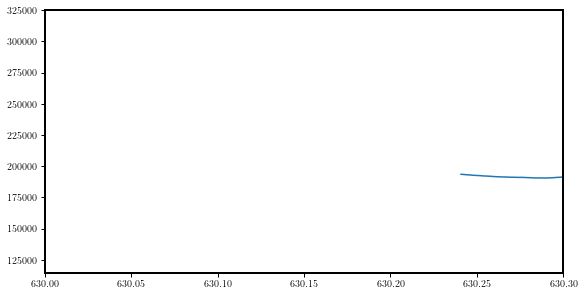

In [15]:
fig, ax = plt.subplots(figsize=(8,4),constrained_layout=True)

ax.plot(wvl,np.mean(test_data[0,:,:],axis=0))
ax.set_xlim(630.0,630.3)

In [11]:
test_data.shape

(1, 977, 2556)